## Objectives
- Customers can quickly find useful products.
- Product and content can be made personalized on a website using recommendation .
- It increases customer buying interest and engagements.
- Increase sales by providing product buying suggestion using advertisements (TV, News, online and google ads etc)


## Models used in this study

1. Collaborative filtering
2. Based on popularity

---
## Import library files

In [1]:
# Import necessary library
# -------------------------------------------------------

# To process CSV input datasets
import pandas as pd

# To process linear algebra statement
import numpy as np 

# To display charts
import matplotlib.pyplot as plt
import seaborn as sns

#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD

# Date and time operation
from datetime import datetime

## Loading data from file

In [2]:
# Filename of the CSV dataset
data_filename="./datasets/ratings_Beauty.csv"

# List of the fields in dataset
data_fields=['userId', 'productId','Rating','timestamp']

In [3]:
# Read data from CSV file
ds=pd.read_csv(data_filename,names=data_fields, header=1)

In [4]:
# Display total number of rows and column in dataset
print('Total rows: ', ds.shape[0])
print('Total columns: ', ds.shape[1])

Total rows:  2023069
Total columns:  4


In [5]:
# Display sample list of data
ds.head()

,userId,productId,Rating,timestamp
0,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
1,A1Z513UWSAAO0F,0558925278,5.0,1404691200
2,A1WMRR494NWEWV,0733001998,4.0,1382572800
3,A3IAAVS479H7M7,0737104473,1.0,1274227200
4,AKJHHD5VEH7VG,0762451459,5.0,1404518400


In [6]:
ds['Rating'].describe()

count    2.023069e+06
mean     4.149035e+00
std      1.311505e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

## Data Pre-processing

In [7]:
# Select most recent reviews
ds=ds.sort_values(by="timestamp", ascending=False)

ds.head()

,userId,productId,Rating,timestamp
1871589,A3US3MUN4V1WBK,B00CBAOPP8,5.0,1406073600
1910566,ALN3OUHILBCXN,B00DJ4MQDI,1.0,1406073600
2000358,A1HC5ZGA398N8A,B00I2495QG,5.0,1406073600
1967775,A3V0Z0RP3UFDXE,B00GJX58PE,5.0,1406073600
2023008,A4KNTOJNA73CD,B00LJEACWC,5.0,1406073600


In [8]:
# Remove Unnecessary columns and data
# Remove timestamp
ds=ds.drop('timestamp', 1)

In [9]:
# Select sample data of 10 lakhs rows
ds=ds.iloc[:1000000,0:]

In [10]:
# Print number of record in dataset
ds.count()

userId       1000000
productId    1000000
Rating       1000000
dtype: int64

In [11]:
# Total products and ratings
print("Total of unique values of each column")
print("Users    :", len(np.unique(ds.userId)))
print("Products :", len(np.unique(ds.productId)))
print("Ratings  :", len(np.unique(ds.Rating)))

Total of unique value in each column
Users    : 637299
Products : 174191
Ratings  : 5


In [12]:
# remove all the duplicate values
ds.drop_duplicates(inplace=True, keep=False)

In [13]:
# Print number of record in dataset
ds.count()

userId       1000000
productId    1000000
Rating       1000000
dtype: int64

## View dataset summary

The below chart clearly shows that the number of 5 star ratings are higher than 1 to 4 stars. This means most of the customer given five star reviews

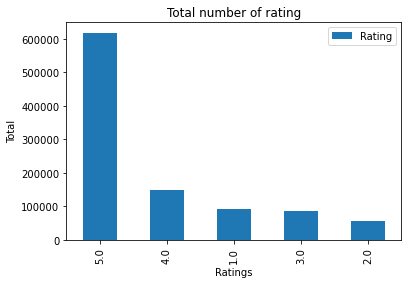

In [14]:
# Display bar chart using above dataset
pd.value_counts(ds['Rating']).plot.bar()
# Show label on X-Axis 
plt.xlabel("Ratings")

# Show label on Y-Axis 
plt.ylabel('Total')

# Show chart title
plt.title('Total number of rating')

plt.legend()


# Product buying suggestion based on collaborative filtering

In [15]:
# Select sample data of 20000 ratings
sample2=ds.iloc[:20000,0:]

In [16]:
# Create sparce matrix and fill up null value by zero
ds_ratings = sample2.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)

# now create matrix transpose
ds_ratings = ds_ratings.T

# Display total number of rows and column in dataset
print('Total rows: ', ds_ratings.shape[0])
print('Total columns: ', ds_ratings.shape[1])

Total rows:  12669
Total columns:  15450


In [17]:
# Now decompose above matrix
SVD = TruncatedSVD(n_components=10)

# Fitting the tranformation
dec_matrix = SVD.fit_transform(ds_ratings)

# display sample matrix
print(dec_matrix.shape)

(12669, 10)


In [18]:
dec_matrix

array([[ 8.33029525e-09, -8.29182524e-09,  1.95384779e-07, ...,
         2.34839348e-06,  1.23330268e-06,  1.97402516e-06],
       [-8.40192622e-11, -5.68783419e-11, -3.64213058e-09, ...,
        -8.02534239e-09,  5.04260266e-08, -1.62118129e-08],
       [ 2.35382825e-12, -3.21913976e-10, -4.13064218e-10, ...,
        -6.20968938e-09,  1.21746063e-09, -2.10420156e-08],
       ...,
       [-4.15044735e-09, -1.15229196e-09, -4.61967974e-08, ...,
        -7.18989587e-08, -7.04595431e-07, -8.98762770e-08],
       [-3.47248853e-11, -2.70200427e-10,  1.29317898e-09, ...,
        -1.50290167e-08, -2.15319789e-08, -2.33138231e-08],
       [ 2.49954008e-06, -1.96371157e-06,  3.36995079e-05, ...,
         5.84332221e-04, -2.64720293e-04, -4.66426643e-04]])

In [19]:
# find correlation coefficient and prepare matrix
crm = np.corrcoef(dec_matrix)
crm.shape

(12669, 12669)

In [20]:
crm

array([[ 1.        , -0.13311029, -0.73786432, ..., -0.47431241,
        -0.84000205,  0.25255465],
       [-0.13311029,  1.        ,  0.28579789, ..., -0.6800997 ,
        -0.2638908 , -0.31961917],
       [-0.73786432,  0.28579789,  1.        , ...,  0.3079721 ,
         0.76153731,  0.06484301],
       ...,
       [-0.47431241, -0.6800997 ,  0.3079721 , ...,  1.        ,
         0.69008464,  0.12125757],
       [-0.84000205, -0.2638908 ,  0.76153731, ...,  0.69008464,
         1.        ,  0.16499508],
       [ 0.25255465, -0.31961917,  0.06484301, ...,  0.12125757,
         0.16499508,  1.        ]])

Now let's suggest 10 product based on selected item by he or she already bought

In [21]:
"""
Index : product index value in the list
"""
def suggest_me_collaborative(index):

    # Now select one product from the list i.e. 80 (already bought by the customer)
    productId=ds_ratings.index[index]
    print('Customer Buying:',productId)

    # extract related product
    correlation_product = crm[index]

    # select product correlation coefficient higher than .90
    products_list = list(ds_ratings.index[correlation_product > 0.90])
    
    # Select 10 products
    product_list=products_list[0:10]

    # display list of 10 recommend products
    print('\nSuggestion to also buy:',product_list)
    return product_list

In [22]:
# Product ID as index of the product in dataset
list1=suggest_me_collaborative(20)

Customer Buying: B000052XZX

Suggestion to also buy: ['B000052XZX', 'B000GDF48O', 'B000WZRBOQ', 'B000X1LOJM', 'B0015Z9096', 'B001F0QX50', 'B001L7MZKY', 'B002AH449E', 'B003249FYI', 'B003LR5QWQ']


In [23]:
# Product ID as index of the product in dataset
list1=suggest_me_collaborative(10)

Customer Buying: 9790781687

Suggestion to also buy: ['6167061580', '9790781687', 'B0002SGSNI', 'B0006Q232Q', 'B000FMNQP4', 'B000GCIAYK', 'B000GJ7C74', 'B000JD4N9M', 'B000LQL5PC', 'B000TSIJDS']


In [24]:
# Product ID as index of the product in dataset
list1=suggest_me_collaborative(9)

Customer Buying: 9790781369

Suggestion to also buy: ['9790781369', 'B00004TMFE', 'B0000531N1', 'B0006PLP9O', 'B0008IV7BU', 'B000ARDBH2', 'B000BRGR5Y', 'B000C1ZAZW', 'B000C21B1S', 'B000CSLIII']


In [25]:
# Extract product form the original list
sample1=sample2[sample2['productId'].isin(list1)][['productId','Rating']]

In [26]:
sample1

,productId,Rating
204503,B000C1ZAZW,5.0
209903,B000C21B1S,5.0
1387,9790781369,5.0
132670,B0008IV7BU,5.0
2449,B00004TMFE,5.0
132672,B0008IV7BU,1.0
132671,B0008IV7BU,5.0
118469,B0006PLP9O,5.0
185889,B000BRGR5Y,5.0
13064,B0000531N1,5.0


Now, Find popularity base highest product for above results

            Rating
productId         
B0008IV7BU       3
B000ARDBH2       2
9790781369       1
B00004TMFE       1
B0000531N1       1
B0006PLP9O       1
B000BRGR5Y       1
B000C1ZAZW       1
B000C21B1S       1
B000CSLIII       1


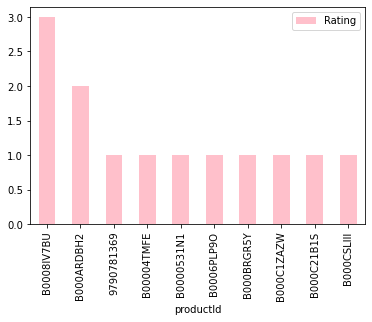

In [28]:
show_me_best_products(list1)

In [27]:
# List of suggested product by collabrative model filtering
def show_me_best_products(products_list):
    
    # Extract product form the original list
    sample1=sample2[sample2['productId'].isin(products_list)][['productId','Rating']]
    
    # count product wise total ratings
    ds_ratings = sample1.groupby(by='productId')['Rating'].count()
    
    # Calculate average value of product rating 
    ds_mean_rating = pd.DataFrame(sample1.groupby('productId')['Rating'].mean())

    # count number of product ratings
    ds_mean_rating['Total'] = pd.DataFrame(sample1.groupby('productId')['Rating'].count())

    # Count product wise ratings
    suggested_products = pd.DataFrame(sample1.groupby('productId')['Rating'].count())

    # Sorting descending order
    suggested_products = suggested_products.sort_values('Rating', ascending=False)

    # Display most popular products
    suggested_products.head(10).plot(kind = "bar",color="pink")
    
    print(suggested_products.head(10))

# Product buying suggestion based on popularity

In [29]:
# Extract product which rate more than 80 time
sample1=ds.groupby("productId").filter(lambda a:a['Rating'].count()>80)

In [30]:
# count product wise total ratings
ds_ratings = sample1.groupby(by='productId')['Rating'].count()
print(ds_ratings)

productId
B00004TUBL    240
B00004U9UY     81
B000050B6U    178
B000052XZP    110
B000052YM7    209
             ... 
B00KHGIK54    157
B00KHH2VOY    162
B00KQBR9FM    137
B00KWFDBKE    338
B00L5JHZJO    488
Name: Rating, Length: 1333, dtype: int64


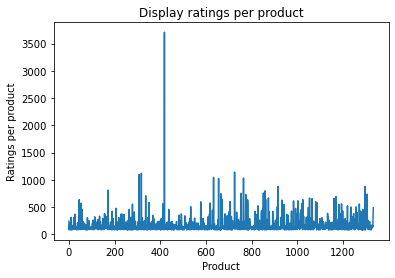

Maximum values:
 3708

Minimum values:
 81


In [31]:
# Display bar chart using above dataset
plt.plot(ds_ratings.values)

# Show label on X-Axis 
plt.xlabel("Product")

# Show label on Y-Axis 
plt.ylabel('Ratings per product')

# Show chart title
plt.title('Display ratings per product')

# Display graph
plt.show()

# Display minimum and maximum ratings ratings
print('Maximum values:\n',ds_ratings.max())
print('\nMinimum values:\n',ds_ratings.min())

In [32]:
# Calculate average value of product rating 
ds_mean_rating = pd.DataFrame(sample1.groupby('productId')['Rating'].mean())

# count number of product ratings
ds_mean_rating['Total'] = pd.DataFrame(sample1.groupby('productId')['Rating'].count())

# Display sample valuesx
print(ds_mean_rating.head())

              Rating  Total
productId                  
B00004TUBL  4.658333    240
B00004U9UY  4.654321     81
B000050B6U  4.258427    178
B000052XZP  4.245455    110
B000052YM7  4.086124    209


In [33]:
print('Maximum values:\n',ds_mean_rating.max())
print('\nMinimum values:\n',ds_mean_rating.min())

Maximum values:
 Rating       4.976471
Total     3708.000000
dtype: float64

Minimum values:
 Rating     2.009709
Total     81.000000
dtype: float64


In [34]:
ds_mean_rating

,Rating,Total
productId,,
B00004TUBL,4.658333,240
B00004U9UY,4.654321,81
B000050B6U,4.258427,178
B000052XZP,4.245455,110
B000052YM7,4.086124,209
...,...,...
B00KHGIK54,4.757962,157
B00KHH2VOY,4.802469,162
B00KQBR9FM,4.686131,137


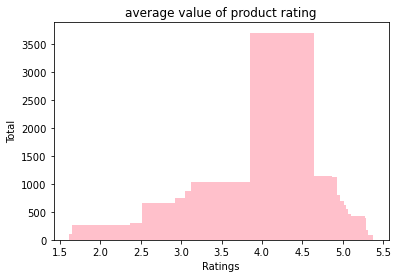

In [35]:
# Display bar graph of average ratings
plt.bar(ds_mean_rating['Rating'], ds_mean_rating['Total'],color="pink")
plt.ylabel("Total")
plt.title("average value of product rating")
plt.xlabel("Ratings")
plt.show()

In [36]:
# Count product wise ratings
suggested_products = pd.DataFrame(sample1.groupby('productId')['Rating'].count())

In [37]:
# Sorting descending order
suggested_products = suggested_products.sort_values('Rating', ascending=False)

In [38]:
selected1=suggested_products[0:25].reset_index()

<AxesSubplot:>

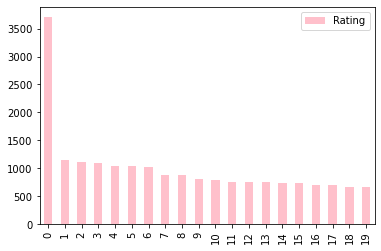

In [39]:
# Display most popular products
selected1.head(20).plot(kind = "bar",color="pink")

In [40]:
selected1

,productId,Rating
0,B001MA0QY2,3708
1,B004OHQR1Q,1141
2,B00121UVU0,1119
3,B000ZMBSPE,1095
4,B003V265QW,1045
5,B00538TSMU,1033
6,B0043OYFKU,1026
7,B007BLN17K,881
8,B00I073WLE,880
9,B000FS05VG,810


In [41]:
suggested_products[0:25]

,Rating
productId,
B001MA0QY2,3708
B004OHQR1Q,1141
B00121UVU0,1119
B000ZMBSPE,1095
B003V265QW,1045
B00538TSMU,1033
B0043OYFKU,1026
B007BLN17K,881
B00I073WLE,880
